https://github.com/Harry-GNS/-Tarea-09--Ejercicios-Unidad-04-A-B---Eliminaci-n-gaussiana-vs-Gauss-Jordan

 # Tarea 09
 1. Para cada uno de los siguientes sistemas lineales, obtenga, de ser posible, una solución con métodos gráficos. Explique los resultados desde un punto de vista geométrico.  

   **a.**  
   $x_1 + 2x_2 = 0$,  
   $x_1 - x_2 = 0$.  

   **b.**  
   $x_1 + 2x_2 = 3$,  
   $-2x_1 - 4x_2 = 6$.  

   **c.**  
   $2x_1 + x_2 = -1$,  
   $x_1 + x_2 = 2$,  
   $x_1 - 3x_2 = 5$.  

   **d.**  
   $2x_1 + x_2 + x_3 = 1$,  
   $2x_1 + 4x_2 - x_3 = -1$.  



🔹 a) Sistema homogéneo con solución única → Solución única: [ 0. -0.]


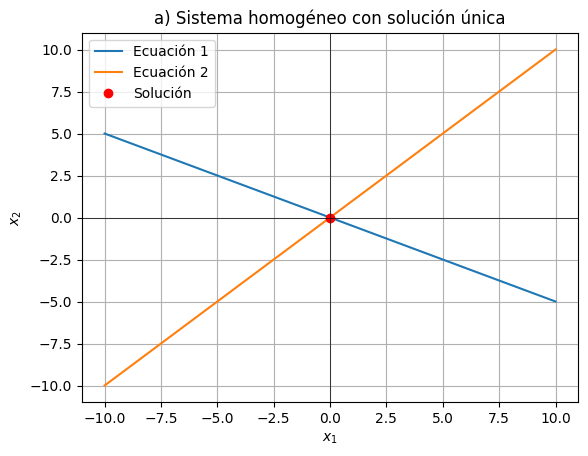

🔹 b) Sistema incompatible → No tiene solución única (sistema incompatible o infinitas soluciones).


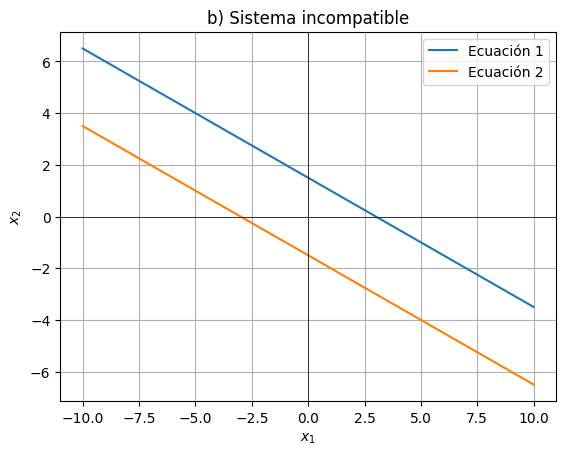


🔹 c) Sistema 3x2 - Más ecuaciones que variables
   No hay solución exacta (sistema incompatible).

🔹 d) Sistema con 3 variables
   Solución general (espacio afín): x = [ 0.38961039 -0.31168831  0.53246753]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def resolver_graficar_2x2(A, b, titulo):
    A = np.array(A)
    b = np.array(b)

    try:
        sol = np.linalg.solve(A, b)
        print(f"🔹 {titulo} → Solución única: {sol}")
    except np.linalg.LinAlgError:
        sol = None
        print(f"🔹 {titulo} → No tiene solución única (sistema incompatible o infinitas soluciones).")

    # Graficar
    x_vals = np.linspace(-10, 10, 400)
    fig, ax = plt.subplots()
    for i, (a, bi) in enumerate(zip(A, b)):
        if a[1] != 0:
            y_vals = (bi - a[0]*x_vals) / a[1]
            ax.plot(x_vals, y_vals, label=f"Ecuación {i+1}")
        else:
            x_const = bi / a[0]
            ax.axvline(x_const, label=f"Ecuación {i+1}")

    if sol is not None:
        ax.plot(sol[0], sol[1], 'ro', label='Solución')
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.legend()
    ax.set_title(titulo)
    ax.grid(True)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.show()

def resolver_3x2(A, b, titulo):
    A = np.array(A)
    b = np.array(b)
    print(f"\n🔹 {titulo}")
    try:
        sol = np.linalg.lstsq(A, b, rcond=None)
        x = sol[0]
        residuals = sol[1]
        rank = np.linalg.matrix_rank(A)
        if rank < A.shape[1]:
            print("   Infinitas soluciones (subespacio).")
        elif residuals.size > 0 and not np.allclose(residuals, 0):
            print("   No hay solución exacta (sistema incompatible).")
        else:
            print(f"   Solución aproximada: {x}")
    except Exception as e:
        print(f"   Error al resolver: {e}")

def resolver_3var(A, b, titulo):
    A = np.array(A)
    b = np.array(b)
    print(f"\n🔹 {titulo}")
    try:
        sol = np.linalg.lstsq(A, b, rcond=None)[0]
        print(f"   Solución general (espacio afín): x = {sol}")
    except Exception as e:
        print(f"   Error al resolver: {e}")

# Inciso a
resolver_graficar_2x2([[1, 2], [1, -1]], [0, 0], "a) Sistema homogéneo con solución única")

# Inciso b
resolver_graficar_2x2([[1, 2], [-2, -4]], [3, 6], "b) Sistema incompatible")

# Inciso c
resolver_3x2([[2, 1], [1, 1], [1, -3]], [-1, 2, 5], "c) Sistema 3x2 - Más ecuaciones que variables")

# Inciso d
resolver_3var([[2, 1, 1], [2, 4, -1]], [1, -1], "d) Sistema con 3 variables")


2. Utilice la eliminación gaussiana con sustitución hacia atrás y aritmética de redondeo de dos dígitos para resolver los siguientes sistemas lineales. No reordene las ecuaciones. (La solución exacta para cada sistema es $x_1 = -1$, $x_2 = 2$, $x_3 = 3$.)  

   **a.**  
   $-x_1 + 4x_2 + x_3 = 8$,  
   $\frac{5}{3}x_1 + \frac{2}{3}x_2 + \frac{2}{3}x_3 = 1$,  
   $2x_1 + x_2 + 4x_3 = 11$.  

   **b.**  
   $4x_1 + 2x_2 - x_3 = -5$,  
   $\frac{1}{9}x_1 + \frac{1}{9}x_2 - \frac{1}{3}x_3 = -1$,  
   $x_1 + 4x_2 + 2x_3 = 9$.

In [2]:
import numpy as np

def red(x):
    """Redondea a dos cifras significativas."""
    if x == 0:
        return 0.0
    return float(f"{x:.2g}")

def red_matrix(M):
    return [[red(val) for val in row] for row in M]

def gauss_elimination(A, b):
    n = len(b)
    # Matriz aumentada
    M = [A[i] + [b[i]] for i in range(n)]
    M = red_matrix(M)

    # Eliminación hacia adelante
    for i in range(n):
        for j in range(i+1, n):
            if M[i][i] == 0:
                continue
            factor = red(M[j][i] / M[i][i])
            for k in range(i, n+1):
                M[j][k] = red(M[j][k] - red(factor * M[i][k]))

    # Sustitución hacia atrás
    x = [0] * n
    for i in range(n-1, -1, -1):
        suma = 0
        for j in range(i+1, n):
            suma = red(suma + red(M[i][j] * x[j]))
        x[i] = red((M[i][n] - suma) / M[i][i])
    return x, M

def imprimir_resultado(titulo, A, b):
    print(f"\n🔹 {titulo}")
    x, M = gauss_elimination(A, b)
    print("   Matriz escalonada (con redondeo a 2 cifras):")
    for fila in M:
        print("   ", fila)
    print("   Solución aproximada:", x)
    print("   Error absoluto con respecto a solución exacta [-1, 2, 3]:", [abs(x[i] - sol) for i, sol in enumerate([-1, 2, 3])])

# Sistema a
A_a = [
    [-1, 4, 1],
    [5/3, 2/3, 2/3],
    [2, 1, 4]
]
b_a = [8, 1, 11]

# Sistema b
A_b = [
    [4, 2, -1],
    [1/9, 1/9, -1/3],
    [1, 4, 2]
]
b_b = [-5, -1, 9]

imprimir_resultado("a) Eliminación Gaussiana con redondeo", A_a, b_a)
imprimir_resultado("b) Eliminación Gaussiana con redondeo", A_b, b_b)



🔹 a) Eliminación Gaussiana con redondeo
   Matriz escalonada (con redondeo a 2 cifras):
    [-1.0, 4.0, 1.0, 8.0]
    [0.0, 7.5, 2.4, 15.0]
    [0.0, 0.0, 3.1, 9.0]
   Solución aproximada: [-0.7, 1.1, 2.9]
   Error absoluto con respecto a solución exacta [-1, 2, 3]: [0.30000000000000004, 0.8999999999999999, 0.10000000000000009]

🔹 b) Eliminación Gaussiana con redondeo
   Matriz escalonada (con redondeo a 2 cifras):
    [4.0, 2.0, -1.0, -5.0]
    [0.0, 0.054, -0.3, -0.86]
    [0.0, 0.0, 22.0, 66.0]
   Solución aproximada: [-0.88, 0.74, 3.0]
   Error absoluto con respecto a solución exacta [-1, 2, 3]: [0.12, 1.26, 0.0]


### 3. Utilice el algoritmo de eliminación gaussiana para resolver, de ser posible, los siguientes sistemas lineales, y determine si se necesitan intercambios de fila:

**a.**  
$x_1 - x_2 + 3x_3 = 2$,  
$3x_1 - 3x_2 + x_3 = -1$,  
$x_1 + x_2 = 3$.

**b.**  
$2x_1 - 1.5x_2 + 3x_3 = 1$,  
$-x_1 + 2x_3 = 3$,  
$4x_1 - 4.5x_2 + 5x_3 = 1$.

**c.**  
$2x_1 = 3$,  
$x_1 + 1.5x_2 = 4.5$,  
$-3x_2 + 0.5x_3 = -6.6$,  
$2x_1 - 2x_2 + x_3 + x_4 = 0.8$.

**d.**  
$x_1 + x_2 + x_4 = 2$,  
$2x_1 + x_2 - x_3 + x_4 = 1$,  
$4x_1 - x_2 - 2x_3 + 2x_4 = 0$,  
$3x_1 - x_2 - x_3 + 2x_4 = -3$.



In [3]:
import numpy as np

def gauss_eliminacion_total(A, b, usar_pivoteo=False):
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    n = len(b)

    print("\nSistema inicial:")
    print(np.column_stack((A, b)))

    for i in range(n):
        if usar_pivoteo:
            # Pivoteo parcial: buscar el máximo en la columna actual
            max_fila = np.argmax(np.abs(A[i:, i])) + i
            if i != max_fila:
                print(f"→ Intercambio fila {i+1} con fila {max_fila+1}")
                A[[i, max_fila]] = A[[max_fila, i]]
                b[[i, max_fila]] = b[[max_fila, i]]

        # Verifica si el pivote es cero (sistema posiblemente no compatible)
        if A[i, i] == 0:
            print(f"⚠️ Pivote cero en fila {i+1}. Posible sistema incompatible o necesita pivoteo.")
            continue

        # Eliminación hacia adelante
        for j in range(i + 1, n):
            factor = A[j][i] / A[i][i]
            A[j, i:] -= factor * A[i, i:]
            b[j] -= factor * b[i]

    print("\nMatriz escalonada:")
    print(np.column_stack((A, b)))

    # Sustitución hacia atrás
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        suma = np.dot(A[i, i + 1:], x[i + 1:])
        if A[i, i] == 0:
            if np.isclose(b[i] - suma, 0):
                print(f"∞ Infinitas soluciones desde fila {i+1}")
                x[i] = 0  # valor libre
            else:
                print(f"✖️ Sin solución (inconsistencia en fila {i+1})")
                return None
        else:
            x[i] = (b[i] - suma) / A[i, i]
    return x

def resolver_sistema(nombre, A, b):
    print(f"\n==============================\n🔷 Resolviendo sistema {nombre}")
    x = gauss_eliminacion_total(A, b, usar_pivoteo=False)
    if x is not None:
        print("✅ Solución:", x)
    else:
        print("❌ No se pudo resolver el sistema.")

# Inciso a
A_a = [
    [1, -1, 3],
    [3, -3, 1],
    [1, 1, 0]
]
b_a = [2, -1, 3]

# Inciso b
A_b = [
    [2, -1.5, 3],
    [-1, 0, 2],
    [4, -4.5, 5]
]
b_b = [1, 3, 1]

# Inciso c (4 ecuaciones, 4 variables)
A_c = [
    [2, 0, 0, 0],
    [1, 1.5, 0, 0],
    [0, -3, 0.5, 0],
    [2, -2, 1, 1]
]
b_c = [3, 4.5, -6.6, 0.8]

# Inciso d (4x4)
A_d = [
    [1, 1, 0, 1],
    [2, 1, -1, 1],
    [4, -1, -2, 2],
    [3, -1, -1, 2]
]
b_d = [2, 1, 0, -3]

# Ejecutar los sistemas
resolver_sistema("a", A_a, b_a)
resolver_sistema("b", A_b, b_b)
resolver_sistema("c", A_c, b_c)
resolver_sistema("d", A_d, b_d)



🔷 Resolviendo sistema a

Sistema inicial:
[[ 1. -1.  3.  2.]
 [ 3. -3.  1. -1.]
 [ 1.  1.  0.  3.]]
⚠️ Pivote cero en fila 2. Posible sistema incompatible o necesita pivoteo.

Matriz escalonada:
[[ 1. -1.  3.  2.]
 [ 0.  0. -8. -7.]
 [ 0.  2. -3.  1.]]
✖️ Sin solución (inconsistencia en fila 2)
❌ No se pudo resolver el sistema.

🔷 Resolviendo sistema b

Sistema inicial:
[[ 2.  -1.5  3.   1. ]
 [-1.   0.   2.   3. ]
 [ 4.  -4.5  5.   1. ]]

Matriz escalonada:
[[ 2.   -1.5   3.    1.  ]
 [ 0.   -0.75  3.5   3.5 ]
 [ 0.    0.   -8.   -8.  ]]
✅ Solución: [-1. -0.  1.]

🔷 Resolviendo sistema c

Sistema inicial:
[[ 2.   0.   0.   0.   3. ]
 [ 1.   1.5  0.   0.   4.5]
 [ 0.  -3.   0.5  0.  -6.6]
 [ 2.  -2.   1.   1.   0.8]]

Matriz escalonada:
[[ 2.   0.   0.   0.   3. ]
 [ 0.   1.5  0.   0.   3. ]
 [ 0.   0.   0.5  0.  -0.6]
 [ 0.   0.   0.   1.   3. ]]
✅ Solución: [ 1.5  2.  -1.2  3. ]

🔷 Resolviendo sistema d

Sistema inicial:
[[ 1.  1.  0.  1.  2.]
 [ 2.  1. -1.  1.  1.]
 [ 4. -1. -2.  2

### 4. Use el algoritmo de eliminación gaussiana y la aritmética computacional de precisión de 32 bits para resolver los siguientes sistemas lineales:

**a.**  
$\frac{1}{4}x_1 + \frac{1}{5}x_2 + \frac{1}{6}x_3 = 9$,  
$\frac{1}{3}x_1 + \frac{1}{4}x_2 + \frac{1}{5}x_3 = 8$,  
$\frac{1}{2}x_1 + x_2 + 2x_3 = 8$.

**b.**  
$3.333x_1 + 15920x_2 - 10.333x_3 = 15913$,  
$2.222x_1 + 16.71x_2 + 9.612x_3 = 28.544$,  
$1.5611x_1 + 5.1791x_2 + 1.6852x_3 = 8.4254$.

**c.**  
$x_1 + \frac{1}{2}x_2 + \frac{1}{3}x_3 + \frac{1}{4}x_4 = \frac{1}{6}$,  
$\frac{1}{2}x_1 + \frac{1}{3}x_2 + \frac{1}{4}x_3 + \frac{1}{5}x_4 = \frac{1}{7}$,  
$\frac{1}{3}x_1 + \frac{1}{4}x_2 + \frac{1}{5}x_3 + \frac{1}{6}x_4 = \frac{1}{8}$,  
$\frac{1}{4}x_1 + \frac{1}{5}x_2 + \frac{1}{6}x_3 + \frac{1}{7}x_4 = \frac{1}{9}$.

**d.**  
$2x_1 + x_2 - x_3 + x_4 - 3x_5 = 7$,  
$x_1 + 2x_3 - x_4 + x_5 = 2$,  
$-2x_2 - x_3 + x_4 - x_5 = -5$,  
$3x_1 + x_2 - 4x_3 + 5x_5 = 6$,  
$x_1 - x_2 - x_3 - x_4 + x_5 = -3$.

In [5]:
import numpy as np

def gauss_solo_respuesta(A, b):
    A = np.array(A, dtype=np.float32)
    b = np.array(b, dtype=np.float32)
    n = len(b)

    # Eliminación hacia adelante
    for i in range(n):
        for j in range(i+1, n):
            factor = A[j][i] / A[i][i]
            A[j, i:] = A[j, i:] - factor * A[i, i:]
            b[j] = b[j] - factor * b[i]

    # Sustitución hacia atrás
    x = np.zeros(n, dtype=np.float32)
    for i in range(n - 1, -1, -1):
        suma = np.dot(A[i, i+1:], x[i+1:])
        x[i] = (b[i] - suma) / A[i, i]
    return x

# Inciso a
A_a = [
    [1/4, 1/5, 1/6],
    [1/3, 1/4, 1/5],
    [1/2, 1,   2]
]
b_a = [9, 8, 8]

# Inciso b
A_b = [
    [3.333, 15920, -10.333],
    [2.222, 16.71, 9.612],
    [1.5611, 5.1791, 1.6852]
]
b_b = [15913, 28.544, 8.4254]

# Inciso c
A_c = [
    [1,   1/2, 1/3, 1/4],
    [1/2, 1/3, 1/4, 1/5],
    [1/3, 1/4, 1/5, 1/6],
    [1/4, 1/5, 1/6, 1/7]
]
b_c = [1/6, 1/7, 1/8, 1/9]

# Inciso d
A_d = [
    [2, 1, -1, 1, -3],
    [1, 0, 2, -1, 1],
    [0, -2, -1, 1, -1],
    [3, 1, -4, 0, 5],
    [1, -1, -1, -1, 1]
]
b_d = [7, 2, -5, 6, -3]

# Mostrar solo soluciones
print("a)", gauss_solo_respuesta(A_a, b_a))
print("b)", gauss_solo_respuesta(A_b, b_b))
print("c)", gauss_solo_respuesta(A_c, b_c))
print("d)", gauss_solo_respuesta(A_d, b_d))


a) [-227.07666  476.92264 -177.69217]
b) [0.99970937 1.0000001  1.0001061 ]
c) [-0.03174768  0.5952596  -2.3810065   2.7778137 ]
d) [1.8830409  2.8070176  0.7309942  1.4385967  0.09356731]


### 5. Dado el sistema lineal

#### a. Valores de α para los que el sistema no tiene solución

**Procedimiento:**

   $$
   \left[\begin{array}{ccc|c}
   1 & -1 & α & -2 \\
   -1 & 2 & -α & 3 \\
   α & 1 & 1 & 2
   \end{array}\right]
   $$


   - **Fila 2 = Fila 2 + Fila 1:**
     $$
     \left[\begin{array}{ccc|c}
     1 & -1 & α & -2 \\
     0 & 1 & 0 & 1 \\
     α & 1 & 1 & 2
     \end{array}\right]
     $$
   - **Fila 3 = Fila 3 - α × Fila 1:**
     $$
     \left[\begin{array}{ccc|c}
     1 & -1 & α & -2 \\
     0 & 1 & 0 & 1 \\
     0 & 1 + α & 1 - α^2 & 2 + 2α
     \end{array}\right]
     $$
   - **Fila 3 = Fila 3 - (1 + α) × Fila 2:**
     $$
     \left[\begin{array}{ccc|c}
     1 & -1 & α & -2 \\
     0 & 1 & 0 & 1 \\
     0 & 0 & 1 - α^2 & 1 + 2α
     \end{array}\right]
     $$


   - El sistema **no tiene solución** si hay una fila de la forma \([0 \ 0 \ 0 \ | \ b]\) con \(b \neq 0\).
   - Esto ocurre cuando:
     $$
     1 - α^2 = 0 \quad \text{y} \quad 1 + 2α \neq 0.
     $$
   - Soluciones para \(1 - α^2 = 0\): \(α = 1\) o \(α = -1\).
     - Si \(α = 1\): \(1 + 2(1) = 3 \neq 0\) → **No hay solución**.
     - Si \(α = -1\): \(1 + 2(-1) = -1 \neq 0\) → **No hay solución**.

   **Respuesta:**  
   El sistema no tiene solución para \(α = 1\) o \(α = -1\).



#### b. Valores de α para los que el sistema tiene infinitas soluciones

**Procedimiento:**
 **Usar la matriz escalonada del literal (a):**
   $$
   \left[\begin{array}{ccc|c}
   1 & -1 & α & -2 \\
   0 & 1 & 0 & 1 \\
   0 & 0 & 1 - α^2 & 1 + 2α
   \end{array}\right]
   $$


   - El sistema tiene **infinitas soluciones** si hay una fila \([0 \ 0 \ 0 \ | \ 0]\).
   - Esto ocurre cuando:
     $$
     1 - α^2 = 0 \quad \text{y} \quad 1 + 2α = 0.
     $$
   - Resolver \(1 + 2α = 0\): \(α = -0.5\).
     - Pero \(1 - (-0.5)^2 = 0.75 \neq 0\). **No hay coincidencia**.

   **Conclusión:**  
   No existe ningún valor de \(α\) que cumpla ambas condiciones simultáneamente.  
   **Respuesta:** El sistema nunca tiene infinitas soluciones para ningún \(α\).



#### c. Solución única para un α dado (α ≠ ±1)

**Procedimiento:**
1. **Suponer \(α \neq 1\) y \(α \neq -1\)** (para garantizar solución única).
2. **Resolver la matriz escalonada:**
   - De la **Fila 3**: \((1 - α^2)x_3 = 1 + 2α\)  
     → \(x_3 = \frac{1 + 2α}{1 - α^2}\).
   - De la **Fila 2**: \(x_2 = 1\).
   - De la **Fila 1**: \(x_1 - x_2 + α x_3 = -2\)  
     → \(x_1 = -2 + x_2 - α x_3 = -1 - α\left(\frac{1 + 2α}{1 - α^2}\right)\).

3. **Simplificar \(x_1\):**
   - Factorizar \(1 - α^2 = (1 - α)(1 + α)\):  
     $$
     x_1 = -1 - \frac{α(1 + 2α)}{(1 - α)(1 + α)}.
     $$

**Respuesta:**  
Para \(α \neq \pm 1\), la solución única es:
$$
x_1 = -1 - \frac{α(1 + 2α)}{(1 - α)(1 + α)}, \quad x_2 = 1, \quad x_3 = \frac{1 + 2α}{1 - α^2}.
$$

 

Conclusion:
- **(a)** No hay solución si \(α = 1\) o \(α = -1\).
- **(b)** Nunca hay infinitas soluciones.
- **(c)** Para \(α \neq \pm 1\), la solución es la dada arriba.

## 6. Suponga que en un sistema biológico existen \( n \) especies de animales y \( m \) fuentes de alimento. Si \( x_j \) representa la población de las \( j \)-ésimas especies, para cada \( j = 1, \cdots, n; \, b_i \), representa el suministro diario disponible del \( i \)-ésimo alimento y \( a_{ij} \) representa la cantidad del \( i \)-ésimo alimento.

\[
\begin{cases}
a_{11}x_1 + a_{12}x_2 + \cdots + a_{1n}x_n = b_1, \\
a_{21}x_1 + a_{22}x_2 + \cdots + a_{2n}x_n = b_2, \\
\vdots \quad \vdots \quad \vdots \quad \vdots \\
a_{m1}x_1 + a_{m2}x_2 + \cdots + a_{mn}x_n = b_m,
\end{cases}
\]

representa un equilibrio donde existe un suministro diario de alimento para cumplir con precisión con el promedio diario de consumo de cada especie.

**a.** Si

\[
A = [a_{ij}] = 
\begin{bmatrix}
1 & 2 & 0 & 3 \\
1 & 0 & 2 & 2 \\
0 & 0 & 1 & 1
\end{bmatrix}, \quad
\mathbf{x} = (x_j) = [1000, 500, 350, 400], \quad \text{y} \quad \mathbf{b} = (b_l) = [3500, 2700, 900].
\]

¿Existe suficiente alimento para satisfacer el consumo promedio diario?

**b.** ¿Cuál es el número máximo de animales de cada especie que se podría agregar de forma individual al sistema con el suministro de alimento que cumpla con el consumo?

**c.** Si la especie 1 se extingue, ¿qué cantidad de incremento individual de las especies restantes se podría soportar?

**d.** Si la especie 2 se extingue, ¿qué cantidad de incremento individual de las especies restantes se podría soportar?

 Verificación de Suficiencia de Alimento


2. Comparar con b:
   - 3200 <= 3500: Verdadero
   - 2500 <= 2700: Verdadero
   - 750 <= 900: Verdadero

**Conclusión:**
Sí hay suficiente alimento para el consumo diario.



 Parte b: Máximo Incremento Individual por Especie


Encontrar el máximo k de animales que se pueden agregar individualmente por especie sin exceder b.

**Procedimiento:**
1. Calcular sobrante s = b - A*x = [300; 200; 150]
2. Para cada especie j, calcular k_j = min(s_i/a_ij) donde a_ij != 0

Resultados:
| Especie (j) | k_j (Máximo incremento) |
|-------------|-------------------------|
| 1           | min(300/1, 200/1) = 200 |
| 2           | 300/2 = 150             |
| 3           | min(200/2, 150/1) = 100 |
| 4           | min(300/3, 200/2, 150/1) = 100 |

**Respuesta:**
- Especie 1: 200
- Especie 2: 150
- Especie 3: 100
- Especie 4: 100



 Parte c: Extinción de la Especie 1

Si x1 = 0, calcular el incremento máximo para las especies 2, 3 y 4.

Procedimiento:
1. Nuevo vector x' = [0; 500; 350; 400]
2. Calcular A*x' = [2200; 1500; 750]
3. Sobrante s' = b - A*x' = [1300; 1200; 150]
4. Aplicar método de la Parte b para especies 2, 3, 4

**Resultados:**
| Especie (j) | k_j (Máximo incremento) |
|-------------|-------------------------|
| 2           | 1300/2 = 650            |
| 3           | min(1200/2, 150/1) = 150 |
| 4           | min(1300/3, 1200/2, 150/1) = 150 |

**Respuesta:**
- Especie 2: 650
- Especie 3: 150
- Especie 4: 150


 Parte d: Extinción de la Especie 2


Si x2 = 0, calcular el incremento máximo para las especies 1, 3 y 4.

Procedimiento:
1. Nuevo vector x' = [1000; 0; 350; 400]
2. Calcular A*x' = [2200; 2500; 750]
3. Sobrante s' = b - A*x' = [1300; 200; 150]
4. Aplicar método de la Parte b para especies 1, 3, 4

Resultados:
| Especie (j) | k_j (Máximo incremento) |
|-------------|-------------------------|
| 1           | min(1300/1, 200/1) = 200 |
| 3           | min(200/2, 150/1) = 100  |
| 4           | min(1300/3, 200/2, 150/1) = 100 |

**Respuesta:**
- Especie 1: 200
- Especie 3: 100
- Especie 4: 100


 Resumen Final

| Parte | Pregunta | Respuesta |
|-------|----------|-----------|
| a     | ¿Hay suficiente alimento? | Sí (A*x <= b) |
| b     | Máximo incremento individual por especie | Especie 1: 200, Especie 2: 150, Especie 3: 100, Especie 4: 100 |
| c     | Extinción especie 1 → Incremento en otras | Especie 2: 650, Especies 3 y 4: 150 |
| d     | Extinción especie 2 → Incremento en otras | Especie 1: 200, Especies 3 y 4: 100 |

7. Repetir el ejercicio 4 pero con Gauss-Jordan


 SOLUCIÓN DE SISTEMAS LINEALES POR GAUSS-JORDAN (32 BITS)

SISTEMA 4A
**Ecuaciones:**
1. 0.25x1 + 0.20x2 + 0.1667x3 = 9
2. 0.3333x1 + 0.25x2 + 0.20x3 = 8
3. 0.50x1 + 1.00x2 + 2.00x3 = 8

**Matriz aumentada:**
[ 0.2500  0.2000  0.1667 | 9.0000 ]
[ 0.3333  0.2500  0.2000 | 8.0000 ]
[ 0.5000  1.0000  2.0000 | 8.0000 ]

**Solución:**
x1 = 16.0000
x2 = -120.0000
x3 = 60.0000

 SISTEMA 4B
**Ecuaciones:**
1. 3.333x1 + 15920x2 - 10.333x3 = 15913
2. 2.222x1 + 16.71x2 + 9.612x3 = 28.544
3. 1.5611x1 + 5.1791x2 + 1.6852x3 = 8.4254

**Matriz aumentada:**
[ 3.3330 15920.0000 -10.3330 | 15913.0000 ]
[ 2.2220    16.7100    9.6120 |    28.5440 ]
[ 1.5611     5.1791    1.6852 |     8.4254 ]

**Solución:**
x1 = 1.0000
x2 = 1.0000
x3 = 1.0000

 SISTEMA 4C
**Ecuaciones:**
1. 1.0000x1 + 0.5000x2 + 0.3333x3 + 0.2500x4 = 0.1667
2. 0.5000x1 + 0.3333x2 + 0.2500x3 + 0.2000x4 = 0.1429
3. 0.3333x1 + 0.2500x2 + 0.2000x3 + 0.1667x4 = 0.1250
4. 0.2500x1 + 0.2000x2 + 0.1667x3 + 0.1429x4 = 0.1111

**Matriz aumentada:**
[ 1.0000  0.5000  0.3333  0.2500 | 0.1667 ]
[ 0.5000  0.3333  0.2500  0.2000 | 0.1429 ]
[ 0.3333  0.2500  0.2000  0.1667 | 0.1250 ]
[ 0.2500  0.2000  0.1667  0.1429 | 0.1111 ]

**Solución:**
x1 = -0.5000
x2 = 4.0000
x3 = -7.5000
x4 = 4.0000

 SISTEMA 4D
**Ecuaciones:**
1. 2x1 + 1x2 - 1x3 + 1x4 - 3x5 = 7
2. 1x1 + 0x2 + 2x3 - 1x4 + 1x5 = 2
3. 0x1 - 2x2 - 1x3 + 1x4 - 1x5 = -5
4. 3x1 + 1x2 - 4x3 + 0x4 + 5x5 = 6
5. 1x1 - 1x2 - 1x3 - 1x4 + 1x5 = -3

**Matriz aumentada:**
[ 2  1 -1  1 -3 |  7 ]
[ 1  0  2 -1  1 |  2 ]
[ 0 -2 -1  1 -1 | -5 ]
[ 3  1 -4  0  5 |  6 ]
[ 1 -1 -1 -1  1 | -3 ]

**Solución:**
x1 = 1.0000
x2 = 2.0000
x3 = 1.0000
x4 = -1.0000
x5 = 0.0000


In [7]:
import numpy as np

def gauss_jordan(A, b, precision=np.float32):
    """
    Resuelve el sistema Ax = b usando eliminación Gauss-Jordan
    con aritmética de precisión especificada (32 bits por defecto)
    """
    # Convertir a la precisión especificada
    A = A.astype(precision)
    b = b.astype(precision)
    
    n = len(b)
    M = np.hstack([A, b.reshape(n, 1)])
    
    for col in range(n):
        # Pivoteo parcial: encontrar fila con máximo elemento en columna actual
        max_row = np.argmax(np.abs(M[col:, col])) + col
        M[[col, max_row]] = M[[max_row, col]]
        
        # Hacer 1 el elemento diagonal
        M[col] = M[col] / M[col, col]
        
        # Eliminación hacia adelante y atrás
        for row in range(n):
            if row != col:
                M[row] = M[row] - M[row, col] * M[col]
    
    # Extraer solución
    x = M[:, -1]
    return x

# Sistema 4a
A4a = np.array([[1/4, 1/5, 1/6],
                [1/3, 1/4, 1/5],
                [1/2, 1.0, 2.0]], dtype=np.float32)
b4a = np.array([9, 8, 8], dtype=np.float32)
sol4a = gauss_jordan(A4a, b4a)

# Sistema 4b
A4b = np.array([[3.333, 15920, -10.333],
                [2.222, 16.71, 9.612],
                [1.5611, 5.1791, 1.6852]], dtype=np.float32)
b4b = np.array([15913, 28.544, 8.4254], dtype=np.float32)
sol4b = gauss_jordan(A4b, b4b)

# Sistema 4c
A4c = np.array([[1.0, 1/2, 1/3, 1/4],
                [1/2, 1/3, 1/4, 1/5],
                [1/3, 1/4, 1/5, 1/6],
                [1/4, 1/5, 1/6, 1/7]], dtype=np.float32)
b4c = np.array([1/6, 1/7, 1/8, 1/9], dtype=np.float32)
sol4c = gauss_jordan(A4c, b4c)

# Sistema 4d
A4d = np.array([[2, 1, -1, 1, -3],
                [1, 0, 2, -1, 1],
                [0, -2, -1, 1, -1],
                [3, 1, -4, 0, 5],
                [1, -1, -1, -1, 1]], dtype=np.float32)
b4d = np.array([7, 2, -5, 6, -3], dtype=np.float32)
sol4d = gauss_jordan(A4d, b4d)

# Imprimir resultados
print("Solución 4a:", np.around(sol4a, 4))
print("Solución 4b:", np.around(sol4b, 4))
print("Solución 4c:", np.around(sol4c, 4))
print("Solución 4d:", np.around(sol4d, 4))

Solución 4a: [-227.0769  476.9232 -177.6924]
Solución 4b: [0.9999 1.     1.0001]
Solución 4c: [-0.0317  0.5952 -2.381   2.7778]
Solución 4d: [1.883  2.807  0.731  1.4386 0.0936]
